# Multi_variates Linear Regression: Housing Prediction



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import*
import math
import copy
from lab_util_multi import  load_house_data, run_gradient_descent 
from lab_util_multi import  norm_plot, plt_equal_scale, plot_cost_i_w
import flask
#from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')
import sigfig
import sklearn
from sklearn import*

In [2]:
def load_data(path):
    data = np.loadtxt(path, delimiter=',')#,skiprows=1)
    X = data[:,:4]
    y = data[:,4] 
    return X,y

In [3]:
X_train,y_train = load_data("linear_regression/houses.txt")

In [4]:
print("First five elements in X_train are:\n",X_train[:10])
print("Shape of X_train:",X_train.shape)
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[9.52e+02 2.00e+00 1.00e+00 6.50e+01]
 [1.24e+03 3.00e+00 1.00e+00 6.40e+01]
 [1.95e+03 3.00e+00 2.00e+00 1.70e+01]
 [1.72e+03 3.00e+00 2.00e+00 4.20e+01]
 [1.96e+03 3.00e+00 2.00e+00 1.50e+01]
 [1.31e+03 2.00e+00 1.00e+00 1.40e+01]
 [8.64e+02 2.00e+00 1.00e+00 6.60e+01]
 [1.84e+03 3.00e+00 1.00e+00 1.70e+01]
 [1.03e+03 3.00e+00 1.00e+00 4.30e+01]
 [3.19e+03 4.00e+00 2.00e+00 8.70e+01]]
Shape of X_train: (100, 4)
Type of X_train: <class 'numpy.ndarray'>


In [5]:
print("First five elements in y_train are:\n", y_train[:10])
print("Shape of y_train:",y_train.shape)
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 [271.5 300.  509.8 394.  540.  415.  230.  560.  294.  718.2]
Shape of y_train: (100,)
Type of y_train: <class 'numpy.ndarray'>


### Data Visualisation
Dataset and its features by plotting each feature versus price.

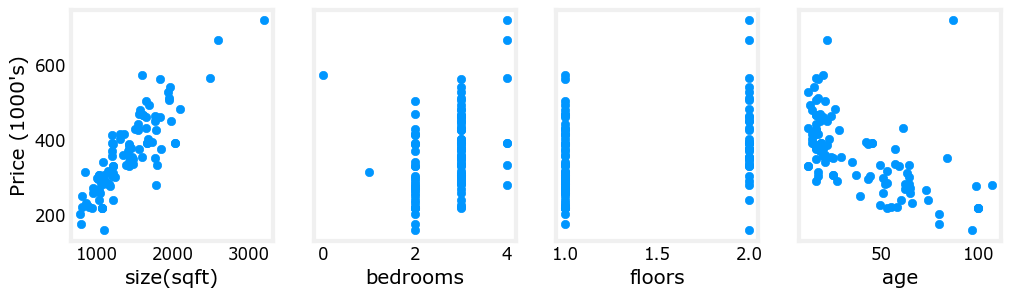

In [6]:
#using one feature (plot size in square feet) for visualization
X_features = ['size(sqft)','bedrooms','floors','age']
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()


## Parameter vector w,b

In [7]:
b_init = 785.18
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])


### Single Prediction element by element
Our previous prediction multiplied one feature value by one parameter and added a bias parameter. A direct extension of our previous implementation of prediction to multiple features would be to implement (1) above using loop over each element, performing the multiply with its parameter and then adding the bias parameter at the end.

In [8]:
def predict_single_loop(x, w, b): 
    """
    Args:
      x (ndarray): Shape (n,) example with
    single predict using linear regression
     multiple features
      w (ndarray): Shape (n,) model parameters    
      b (scalar):  model parameter     
      
    Returns:
      p (scalar):  prediction
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]  
        p = p + p_i         
    p = p + b                
    return p

In [9]:
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [952.   2.   1.  65.]
f_wb shape (), prediction: -575.5070882100002


### Single Prediction, vector
Noting that equation (1) above can be implemented using the dot product as in (2) above. We can make use of vector operations to speed up predictions.

Recall from the Python/Numpy lab that NumPy np.dot()[link] can be used to perform a vector dot product.

In [10]:
def predict(X,w,b):    
    p = np.dot(X, w) + b
    return p

In [11]:
x_vec  = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")
f_wb = predict(X_train[0,:],w_init, b_init)
print(f"prediction: {f_wb}")

x_vec shape (4,), x_vec value: [952.   2.   1.  65.]
prediction: -575.5070882100002


### Compute Cost

In [12]:
def calculate_CostFuncion(X,y,w,b):
    
    m = X.shape[0]
    #m = len(X)
    cost_i = 0.
    for i in range(m):
        f_wbx = np.dot(X[i], w) + b
        cost_i = cost_i + (f_wbx - y[i])**2
    cost =  cost_i*(1/ (2*m))
    
    return cost
        

In [13]:
cost = calculate_CostFuncion(X_train,y_train,w_init,b_init)
print(f'Cost at optimal w :{cost}')

Cost at optimal w :223609.52181394226


### Calculating Gradient

In [14]:
def calculate_Gradient(X,y,w,b):
    
    m,n=X.shape
    
    dj_dw = np.zeros((n,))
    dj_db = 0.
    #f_wb,cost= calculate_CostFuncion(X_train,y_train,w_init,b_init)
    for i in range(m):
        
        f_wb = np.dot(X[i], w) + b
        error = (f_wb - y[i])
        for j in range(n):
            dj_dw[j] = dj_dw[j] + error  * X[i,j]
        dj_db = dj_db + error
        
        dj_dw = dj_dw/m
        dj_db = dj_db/m
        
        return dj_dw,dj_db

In [15]:
#Compute and display gradient 
tmp_dj_dw,tmp_dj_db = calculate_Gradient(X_train, y_train, w_init, b_init)
print(f'dj_dw at initial w,b: {tmp_dj_dw}')
print(f'dj_db at initial w,b:  {tmp_dj_db}')


dj_dw at initial w,b: [-8063.51   -16.94    -8.47  -550.55]
dj_db at initial w,b:  -8.470070882100002


### Calculating Gradient Descent

In [16]:
def calculate_Gradient_Descent(X,y,w_in,b_in,costFunction,gradFunction,alpha,num_iterate):
    #m,n =shape
    
    J_history= []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    dj_dw ,dj_db = calculate_Gradient(X,y,w,b)
    for i in range(num_iterate):
        
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        #save cost in J_history
        if i < 100000:
            J_history.append(calculate_CostFuncion(X,y,w,b)) 
            w_history.append(w)
        if i%math.ceil(num_iterate/10) == 0:
            print(f'Iteration {i:4d} : cost {J_history[-1]:8.2f}')
    return w,b,J_history,w_history

In [17]:
# initialize parameters
initial_w = np.zeros_like(w_init)
#print(initial_w)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 1.0e-7
# run gradient descent 

#[1.29234   0.002715  0.0013575 0.0882375] 
w_final, b_final, J_hist,_ = calculate_Gradient_Descent(X_train, y_train, initial_w, initial_b,
                                                      calculate_CostFuncion, calculate_Gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):#247210
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0 : cost 70882.08
Iteration  100 : cost 57415.23
Iteration  200 : cost 45401.78
Iteration  300 : cost 34841.73
Iteration  400 : cost 25735.09
Iteration  500 : cost 18081.85
Iteration  600 : cost 11882.00
Iteration  700 : cost  7135.56
Iteration  800 : cost  3842.53
Iteration  900 : cost  2002.89
b,w found by gradient descent: 0.00,[0.26 0.   0.   0.02] 
prediction: 247.21, target value: 271.5
prediction: 322.67, target value: 300.0
prediction: 503.54, target value: 509.8
prediction: 446.60, target value: 394.0
prediction: 506.61, target value: 540.0
prediction: 339.88, target value: 415.0
prediction: 224.48, target value: 230.0
prediction: 474.85, target value: 560.0
prediction: 265.95, target value: 294.0
prediction: 827.09, target value: 718.2
prediction: 205.09, target value: 200.0
prediction: 310.46, target value: 302.0
prediction: 402.75, target value: 468.0
prediction: 369.96, target value: 374.2
prediction: 315.60, target value: 388.0
prediction: 283.38, target valu

In [18]:

#print('X_train[:, :4]',X_mapped)
p = predict(X_train,w_final,b_final)

## Accuracy of the Prediction Before Regularization

In [19]:
#accuracy = np.mean(y_train - p <= 0.9) * 100
#print(f'Train diff:{y_train-p}')
#print(f'Train Accuracy(approx %): {accuracy:.2f}')


In [20]:
_,_,hist = run_gradient_descent(X_train, y_train, 1000, alpha = 1.0e-7)

Iteration  Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------|------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.41544e+04  5.5e-02  1.0e-04  5.2e-05  1.2e-03  3.6e-05 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
      100 1.56513e+03  2.5e-01  4.0e-04  1.6e-04 -5.2e-04  2.1e-04 -1.5e+01  6.4e+00  8.2e+00  6.5e+02 -4.4e+00
      200 1.56099e+03  2.5e-01  3.4e-04  7.7e-05 -7.0e-03  2.5e-04 -1.5e+01  6.3e+00  8.2e+00  6.4e+02 -4.5e+00
      300 1.55692e+03  2.5e-01  2.7e-04 -4.9e-06 -1.3e-02  3.0e-04 -1.5e+01  6.3e+00  8.2e+00  6.3e+02 -4.5e+00
      400 1.55292e+03  2.5e-01  2.1e-04 -8.7e-05 -2.0e-02  3.4e-04 -1.5e+01  6.2e+00  8.2e+00  6.3e+02 -4.5e+00
      500 1.54900e+03  2.5e-01  1.5e-04 -1.7e-04 -2.6e-02  3.9e-04 -1.5e+01  6.2e+00  8.2e+00  6.2e+02 -4.6e+00
      600 1.54515e+03  2.5e-01  8.8e-05 -2.5e-04 -3.2e-02  4.4e-04 -1.5e+01  6.1e+00  8.2e+00  6.2e+02

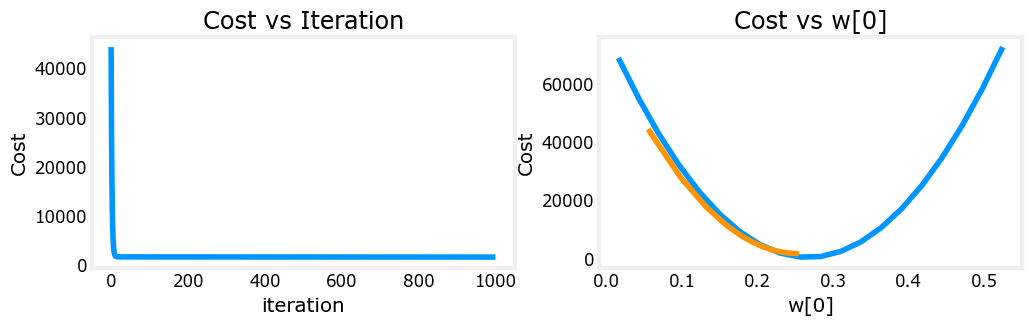

In [21]:
plot_cost_i_w(X_train,y_train,hist)

## Predict Target Using normalize features [Z - Score normalization]

In [22]:
def zscore_Normalize_Features(X):
    mu = np.mean(X,axis=0)
    std = np.std(X, axis=0)
    
    X_norma = (X - mu)/std
    return (mu,std, X_norma)

In [23]:
mu_norm,std_norm,X_norma = zscore_Normalize_Features(X_train)
print(f'X_mu = {mu_norm}, \nX_std = {std_norm}')
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norma,axis=0)}")

X_mu = [1.41e+03 2.71e+00 1.38e+00 3.86e+01], 
X_std = [412.17   0.65   0.49  25.79]
Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.84 6.13 2.06 3.68]


In [24]:
w_norm, b_norm, hist = run_gradient_descent(X_norma, y_train, 1000, 1.0e-1, )

Iteration  Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------|------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.73264e+04  8.9e+00  3.0e+00  3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 2.21728e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -9.4e-01  4.6e-01  5.4e-01 -1.8e-01 -9.6e-03
      200 2.19714e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.3e-02  1.6e-02  1.8e-02 -6.4e-03 -2.6e-07
      300 2.19711e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.1e-03  5.7e-04  6.3e-04 -2.2e-04 -6.9e-12
      400 2.19711e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.9e-05  2.0e-05  2.2e-05 -7.6e-06 -2.8e-13
      500 2.19711e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.3e-06  6.8e-07  7.5e-07 -2.6e-07 -2.2e-13
      600 2.19711e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -4.7e-08  2.4e-08  2.6e-08 -9.1e-09

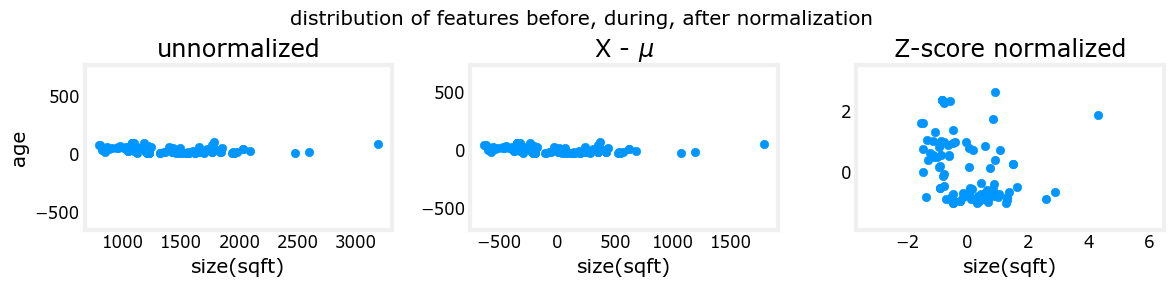

In [25]:
mu     = np.mean(X_train,axis=0)   
X_mean = (X_train - mu)
#X_norm = (X_train - mu)/std      

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norma[:,0], X_norma[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [26]:
#print(zscore_Normalize_Features(X_train))

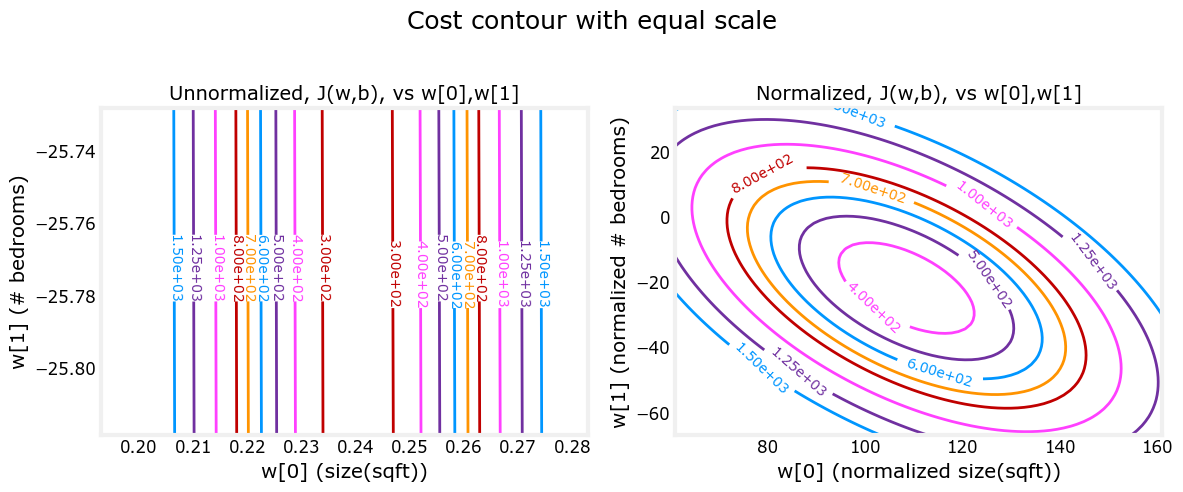

In [27]:
plt_equal_scale(X_train, X_norma, y_train)

### Prediction after features normalization

In [28]:
x_vec = np.array([1725,    3,   2,   42]) #952.   2.   1.  65
n =x_vec.shape[0]
X_house_norm =(x_vec - mu_norm)/std_norm
#print(x_vec.shape) 
prediction = 0
#prediction = predict_single_loop(X_house_norm,w_norm,b_norm) 
prediction = np.dot(X_house_norm, w_norm) +  b_norm 
print(f'predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${prediction*1000:0.02f}')

predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $389610.36


# Applying Regularization 

### Regularized Cost

In [29]:
def regularize_CostFunction(X,y,w,b,lambda_ = 0):
    
    _,n = X.shape
    
    cost_without_reg = calculate_CostFuncion(X,y,w,b)
    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)
    total_reg_cost  = cost_without_reg + (lambda_/2*m )*reg_cost
    
    return total_reg_cost

In [30]:
reg_cost = regularize_CostFunction(X_train,y_train,initial_w,initial_b)
print( f'Cost at optimal w: {reg_cost}')

Cost at optimal w: 71024.09206744001


### Regularized Gradient

In [31]:
def regularize_GradientFunction(X,y,w,b,lambda_ = 1):
    
    m,n = X.shape
    dj_dw_with_reg, dj_db_with_reg = calculate_Gradient(X,y,w,b)
        
    for j in range(n):
        reg_dj_dw = (lambda_/m) * w[j]
    dj_dw_with_reg[j] += reg_dj_dw
    
    return dj_dw_with_reg,dj_db_with_reg
    
    

In [32]:
reg_grad_dw,reg_grad_db = regularize_GradientFunction(X_train,y_train,initial_w,initial_b)
print(f'reg_dj_dw at initial w,b: {reg_grad_dw}')
print(f'reg_dj_db at initial w,b:  {reg_grad_db}')


reg_dj_dw at initial w,b: [-2584.68    -5.43    -2.71  -176.47]
reg_dj_db at initial w,b:  -2.715


## Regularized Gradient Descent

In [33]:
# initialize parameters
initial_w = np.zeros_like(w_init)
#print(initial_w)
initial_b = 1.
# some gradient descent settings
iterations = 1000
alpha = 1.0e-7
#lambda_ = 0.01
# run gradient descent 

#[1.29234   0.002715  0.0013575 0.0882375] 
w, b, J_hist,_ = calculate_Gradient_Descent(X_train, y_train, initial_w, initial_b,
                                                      regularize_CostFunction, regularize_GradientFunction, alpha, iterations)
#print(f"Parameter w,b found by gradient descent: {b:0.2f},{w} ")
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
#print(f'wee; {w_final}')
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w) + b:0.2f}, target value: {y_train[i]}")

Iteration    0 : cost 70521.23
Iteration  100 : cost 57137.74
Iteration  200 : cost 45196.95
Iteration  300 : cost 34698.89
Iteration  400 : cost 25643.54
Iteration  500 : cost 18030.90
Iteration  600 : cost 11860.98
Iteration  700 : cost  7133.78
Iteration  800 : cost  3849.29
Iteration  900 : cost  2007.51
b,w found by gradient descent: 0.00,[0.26 0.   0.   0.02] 
prediction: 247.30, target value: 271.5
prediction: 322.48, target value: 300.0
prediction: 502.68, target value: 509.8
prediction: 445.96, target value: 394.0
prediction: 505.74, target value: 540.0
prediction: 339.62, target value: 415.0
prediction: 224.66, target value: 230.0
prediction: 474.10, target value: 560.0
prediction: 265.97, target value: 294.0
prediction: 825.04, target value: 718.2
prediction: 205.33, target value: 200.0
prediction: 310.32, target value: 302.0
prediction: 402.27, target value: 468.0
prediction: 369.60, target value: 374.2
prediction: 315.43, target value: 388.0
prediction: 283.33, target valu

In [34]:
p = predict(X_train,w,b)
accuracy = np.mean(y_train - p <= 0.9) * 100
#print(f'Train diff:{p - y_train}')
print(f'Train Accuracy(approx): {accuracy:.2f}%')

Train Accuracy(approx): 49.00%


## TEST THE MODEL WITH NEW DATA

In [35]:
x_vec = np.array([1025,    3,    2,   35])
n =x_vec.shape[0]
X_house_norm =(x_vec - mu_norm)/std_norm
#print(x_vec.shape) 
prediction = 0
#prediction = predict_single_loop(x_vec,w_final,b_final) OR
prediction = np.dot(X_house_norm, w_norm) +  b_norm 
print('For House Price , we predict a price of $%.2f' % (prediction))

For House Price , we predict a price of $212.01
